In [1]:
import os
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

In [2]:
final_rdkit_descriptors_df = pd.read_csv('./data/2.final_rdkit_descriptors.csv')
final_rdkit_descriptors_df

,lifetime,Filename,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,MaxPartialCharge,BCUT2D_MWHI,BCUT2D_MRLOW,CM_14,CM_143,CM_542,CM_676,CM_826,CM_1354,CM_1623,CM_1891,CM_2165
0,-2.021156,ps1,9.793981,-0.379630,0.379630,0.194514,16.171947,-0.133537,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-2.993525,ps2,11.997107,-0.021721,0.021721,0.208513,126.915758,0.466066,128.485427,97.125979,25.193210,9.522366,0.000000,21.990788,9.522366,14.545520,0.000000
2,-1.561702,ps3,10.377891,0.571389,0.571389,0.160927,16.507769,0.111797,0.000000,14.545455,25.193210,43.635033,0.000000,0.000000,0.000000,0.000000,0.000000
3,-2.847714,ps4,12.101296,-0.064074,0.064074,0.194013,16.144174,0.097888,19.394027,16.795767,25.192442,21.817517,0.000000,9.522366,8.246545,43.636364,0.000000
4,-3.995537,ps5,10.945093,0.030046,0.030046,0.163022,16.466034,0.101012,0.000000,19.394027,25.192442,14.545520,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,-2.520281,acceptor201,4.277870,0.058102,0.058102,0.000000,0.000000,0.000000,0.000000,152.827791,17.052600,18.849061,0.000000,0.000000,0.000000,0.000000,0.000000
359,1.350373,acceptor202,4.484972,0.787037,0.787037,0.114650,32.142175,1.495429,39.638514,31.580750,15.275802,16.343139,13.863664,14.786577,16.492708,25.192442,16.492923
360,-0.090963,acceptor203,4.323810,0.944480,0.944480,0.112190,32.141875,1.651758,28.265390,71.912172,12.779755,31.464592,0.000000,21.818182,43.639614,12.103014,0.000000
361,-1.036122,acceptor204,4.378565,0.583369,0.583369,0.212617,32.140758,1.339437,27.340339,23.143897,16.710214,14.909516,0.000000,43.639614,25.193210,21.818182,0.000000


In [54]:
'''Filename列名称简化'''
final_rdkit_descriptors_df['Filename'] = final_rdkit_descriptors_df['Filename'].replace(
    {'ps': 'p', 'acceptor': 'a'}, regex=True
)
final_rdkit_descriptors_df.head()

,lifetime,Filename,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,MaxPartialCharge,BCUT2D_MWHI,BCUT2D_MRLOW,CM_14,CM_143,CM_542,CM_676,CM_826,CM_1354,CM_1623,CM_1891,CM_2165
0,-2.021156,p1,9.793981,-0.379630,0.379630,0.194514,16.171947,-0.133537,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1,-2.993525,p2,11.997107,-0.021721,0.021721,0.208513,126.915758,0.466066,128.485427,97.125979,25.193210,9.522366,0.0,21.990788,9.522366,14.545520,0.0
2,-1.561702,p3,10.377891,0.571389,0.571389,0.160927,16.507769,0.111797,0.000000,14.545455,25.193210,43.635033,0.0,0.000000,0.000000,0.000000,0.0
3,-2.847714,p4,12.101296,-0.064074,0.064074,0.194013,16.144174,0.097888,19.394027,16.795767,25.192442,21.817517,0.0,9.522366,8.246545,43.636364,0.0
4,-3.995537,p5,10.945093,0.030046,0.030046,0.163022,16.466034,0.101012,0.000000,19.394027,25.192442,14.545520,0.0,0.000000,0.000000,0.000000,0.0


In [55]:
X = final_rdkit_descriptors_df.drop(columns=['lifetime', 'Filename'], axis=1)  # 特征
y = final_rdkit_descriptors_df['lifetime']               # 目标变量

# 划分训练集和测试集
X_train, X_test, y_train, y_test, train_files, test_files = train_test_split(
    X, y,final_rdkit_descriptors_df['Filename'], test_size=0.1, random_state=37)
model_ = RandomForestRegressor(n_estimators=150, max_depth=3, random_state=1)
model_.fit(X_train, y_train)
# 对测试集进行预测
y_pred = model_.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 
print(f"R^2 Score: {r2}")
print(f"mse Score: {mse}")

R^2 Score: 0.706958742023315
mse Score: 0.8902645791059992


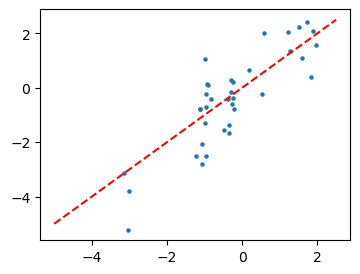

In [56]:
figsize = (4,3)
plt.figure(1, figsize=figsize)
plt.scatter(y_pred, y_test, s=5)
plt.plot([-5, 2.5], [-5, 2.5], "r--")
# plt.axis([min(y_pred)-10,80, min(y_test)-10, 80])
plt.show()

In [2]:
final_rdkit_descriptors_df_without_CM = pd.read_csv('./data/2.final_rdkit_descriptors_without_CM.csv')
final_rdkit_descriptors_df_without_CM.head()

,lifetime,Filename,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,MaxPartialCharge,BCUT2D_MWHI,BCUT2D_MRLOW
0,-2.021156,p1,9.793981,-0.379630,0.379630,0.194514,16.171947,-0.133537
1,-2.993525,p2,11.997107,-0.021721,0.021721,0.208513,126.915758,0.466066
2,-1.561702,p3,10.377891,0.571389,0.571389,0.160927,16.507769,0.111797
3,-2.847714,p4,12.101296,-0.064074,0.064074,0.194013,16.144174,0.097888
4,-3.995537,p5,10.945093,0.030046,0.030046,0.163022,16.466034,0.101012


In [58]:
final_rdkit_descriptors_df_without_CM.columns

Index(['lifetime', 'Filename', 'MaxEStateIndex', 'MinEStateIndex',
       'MinAbsEStateIndex', 'MaxPartialCharge', 'BCUT2D_MWHI', 'BCUT2D_MRLOW'],
      dtype='object')

In [60]:
X = final_rdkit_descriptors_df_without_CM.drop(columns=['lifetime', 'Filename'], axis=1)  # 特征
y = final_rdkit_descriptors_df_without_CM['lifetime']               # 目标变量

# 划分训练集和测试集
X_train, X_test, y_train, y_test, train_files, test_files = train_test_split(
    X, y,final_rdkit_descriptors_df_without_CM['Filename'], test_size=0.1, random_state=37)
model_ = RandomForestRegressor(n_estimators=130, max_depth=3, random_state=1)
model_.fit(X_train, y_train)
# 对测试集进行预测
y_pred = model_.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")
print(f"mse Score: {mse}")

R^2 Score: 0.713896177679429
mse Score: 0.8691885255935727


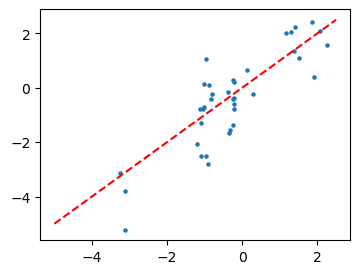

In [61]:
figsize = (4,3)
plt.figure(1, figsize=figsize)
plt.scatter(y_pred, y_test, s=5)
plt.plot([-5, 2.5], [-5, 2.5], "r--")
# plt.axis([min(y_pred)-10,80, min(y_test)-10, 80])
plt.show()

###  rdikit(without CM) with 图网络结构向量

##### 1.  3619global_128dim----R2=0.71

In [30]:
path = './data/gnn_gloabal_features-20250224/global_features_3619_128dim.csv'
global_feature_df = pd.read_csv(path)
# 合并feature_conv2_df和df_lifetime两个DataFrame
merged_df_global_features_3619_128 = pd.merge(final_rdkit_descriptors_df_without_CM, global_feature_df, on='Filename', how='inner')
# merged_df_global_features_4_32 = pd.merge(final_rdkit_descriptors_df, global_feature_df, on='Filename', how='inner')
# 显示合并后的DataFrame的前几行以确认更改
merged_df_global_features_3619_128.head()

,lifetime,Filename,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,MaxPartialCharge,BCUT2D_MWHI,BCUT2D_MRLOW,1,2,...,120,121,122,123,124,125,126,127,128,Lifetime
0,-2.021156,p1,9.793981,-0.379630,0.379630,0.194514,16.171947,-0.133537,0.0,0.086824,...,0.000000,0.000000,0.000000,0.000000,0.0,1.317148,0.001088,0.142791,0.000000,-2.021156
1,-2.993525,p2,11.997107,-0.021721,0.021721,0.208513,126.915758,0.466066,0.0,0.075997,...,0.965752,0.318793,0.637829,2.933986,0.0,0.322345,3.524530,0.029292,0.257751,-2.993525
2,-1.561702,p3,10.377891,0.571389,0.571389,0.160927,16.507769,0.111797,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.084541,0.731553,0.224316,0.000000,-1.561702
3,-2.847714,p4,12.101296,-0.064074,0.064074,0.194013,16.144174,0.097888,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.712523,0.784708,0.000000,0.000000,-2.847714
4,-3.995537,p5,10.945093,0.030046,0.030046,0.163022,16.466034,0.101012,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.138741,0.000000,0.358161,0.000000,-3.995537


In [12]:
X = merged_df_global_features_3619_128.drop(['lifetime', 'Filename','Lifetime'], axis=1)  # 特征
y = merged_df_global_features_3619_128['lifetime']               # 目标变量
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=37)
# n_estimators_list = [50,100,150,200,250,300]
# n_estimators_list = [20,30,40,50,60,70,80,90,100,150,200]
# for n in n_estimators_list:
#     print(f"n_estimators:{n}")
depth = [2,3,4,5]
for n in depth:
    print(f"max_depth:{n}")
    '''找到预测最好的参数值'''
    # a = [150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]
    # a = [300,350,400,450,500]
    # model_ = RandomForestRegressor(n_estimators=n, max_depth=3, random_state=6)  
    model_ = RandomForestRegressor(n_estimators=40, max_depth=n, random_state=6)  
    model_.fit(X_train, y_train)
    # 对测试集进行预测
    y_pred = model_.predict(X_test)
    # 评估模型性能
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred) 
    print(f"R^2 Score: {r2}")  # 3/0.7485677218905828 4/0.7578617615116456
    print(f"mse Score: {mse}") 

max_depth:2
R^2 Score: 0.6503194831476056
mse Score: 1.0623356598541953
max_depth:3
R^2 Score: 0.7105563093695769
mse Score: 0.8793351052106194
max_depth:4
R^2 Score: 0.6795883658562356
mse Score: 0.9734162710779755
max_depth:5
R^2 Score: 0.6828283391711784
mse Score: 0.9635731742408343


##### 2. 3610global-32dim(without CM向量)-----R2=0.673

In [32]:
path = './data/gnn_gloabal_features-20250224/global_features_3610_32dim.csv'
global_feature_df = pd.read_csv(path)
# 合并feature_conv2_df和df_lifetime两个DataFrame
merged_df_global_features_3610_32 = pd.merge(final_rdkit_descriptors_df_without_CM, global_feature_df, on='Filename', how='inner')
# merged_df_global_features_4_32 = pd.merge(final_rdkit_descriptors_df, global_feature_df, on='Filename', how='inner')
# 显示合并后的DataFrame的前几行以确认更改
merged_df_global_features_3610_32.head()

,lifetime,Filename,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,MaxPartialCharge,BCUT2D_MWHI,BCUT2D_MRLOW,1,2,...,24,25,26,27,28,29,30,31,32,Lifetime
0,-2.021156,p1,9.793981,-0.379630,0.379630,0.194514,16.171947,-0.133537,0.000000,0.000000,...,0.295218,1.025087,0.451490,0.148460,0.0,1.201164,0.773314,0.0,0.000000,-2.021156
1,-2.993525,p2,11.997107,-0.021721,0.021721,0.208513,126.915758,0.466066,0.292231,1.271511,...,0.972050,1.362222,0.201516,0.000000,0.0,0.480123,0.000000,0.0,0.421624,-2.993525
2,-1.561702,p3,10.377891,0.571389,0.571389,0.160927,16.507769,0.111797,0.000000,0.274208,...,1.010255,1.691761,0.468684,0.093854,0.0,1.763093,0.000000,0.0,0.000000,-1.561702
3,-2.847714,p4,12.101296,-0.064074,0.064074,0.194013,16.144174,0.097888,0.000000,0.433749,...,1.033166,1.992512,0.513697,0.177059,0.0,2.094475,0.000000,0.0,0.000000,-2.847714
4,-3.995537,p5,10.945093,0.030046,0.030046,0.163022,16.466034,0.101012,0.000000,0.136552,...,0.766422,1.564279,0.473986,0.159804,0.0,1.701937,0.000000,0.0,0.000000,-3.995537


In [17]:
X = merged_df_global_features_3610_32.drop(['lifetime', 'Filename','Lifetime'], axis=1)  # 特征
y = merged_df_global_features_3610_32['lifetime']               # 目标变量
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=37)
# n_estimators_list = [50,100,150,200,250,300]
# n_estimators_list = [20,30,40,50,60,70,80,90,100,150,200]
# for n in n_estimators_list:
#     print(f"n_estimators:{n}")
depth = [2,3,4,5]
for n in depth:
    print(f"max_depth:{n}")
    '''找到预测最好的参数值'''
    # a = [150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]
    # a = [300,350,400,450,500]
    # model_ = RandomForestRegressor(n_estimators=n, max_depth=3, random_state=6)  
    model_ = RandomForestRegressor(n_estimators=90, max_depth=n, random_state=6)  
    model_.fit(X_train, y_train)
    # 对测试集进行预测
    y_pred = model_.predict(X_test)
    # 评估模型性能
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred) 
    print(f"R^2 Score: {r2}")  # 3/0.7485677218905828 4/0.7578617615116456
    print(f"mse Score: {mse}") 

max_depth:2
R^2 Score: 0.6556084047918913
mse Score: 1.0462678213727303
max_depth:3
R^2 Score: 0.6492760914865456
mse Score: 1.0655055023684878
max_depth:4
R^2 Score: 0.6665270718669853
mse Score: 1.0130967156549804
max_depth:5
R^2 Score: 0.6729788473106112
mse Score: 0.9934961065480434


##### 3.  4global-32dim---R2=0.7786

In [13]:
# path = './data/gnn_gloabal_features-20250224/global_features_4_32dim.csv'
path = './data/global_features_4_32dim_2.csv'
global_feature_df = pd.read_csv(path)
# 合并feature_conv2_df和df_lifetime两个DataFrame
merged_df_global_features_4_32 = pd.merge(final_rdkit_descriptors_df_without_CM, global_feature_df, on='Filename', how='inner')
# merged_df_global_features_4_32 = pd.merge(final_rdkit_descriptors_df, global_feature_df, on='Filename', how='inner')
# 显示合并后的DataFrame的前几行以确认更改
merged_df_global_features_4_32.head()

,lifetime,Filename,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,MaxPartialCharge,BCUT2D_MWHI,BCUT2D_MRLOW,1,2,...,24,25,26,27,28,29,30,31,32,Lifetime
0,-2.021156,p1,9.793981,-0.379630,0.379630,0.194514,16.171947,-0.133537,1.543673,0.0,...,0.050135,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.732752,-2.021156
1,-2.993525,p2,11.997107,-0.021721,0.021721,0.208513,126.915758,0.466066,0.873384,0.0,...,0.000000,0.544303,0.048003,0.0,0.0,0.0,0.102597,0.000000,0.451132,-2.993525
2,-1.561702,p3,10.377891,0.571389,0.571389,0.160927,16.507769,0.111797,0.385450,0.0,...,0.623492,0.000000,0.000000,0.0,0.0,0.0,0.007832,0.000000,0.573882,-1.561702
3,-2.847714,p4,12.101296,-0.064074,0.064074,0.194013,16.144174,0.097888,1.035676,0.0,...,1.362904,0.000000,0.013862,0.0,0.0,0.0,0.069370,0.000000,0.501584,-2.847714
4,-3.995537,p5,10.945093,0.030046,0.030046,0.163022,16.466034,0.101012,0.311809,0.0,...,0.953184,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.171555,0.619520,-3.995537


In [50]:
X = merged_df_global_features_4_32.drop(['lifetime', 'Filename','Lifetime'], axis=1)  # 特征
y = merged_df_global_features_4_32['lifetime']               # 目标变量
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=37)
# n_estimators_list = [50,100,150,200,250,300]
# n_estimators_list = [20,30,40,50,60,70,80,90,100,150,200]
# for n in n_estimators_list:
#     print(f"n_estimators:{n}")
depth = [2,3,4,5]
for n in depth:
    print(f"max_depth:{n}")
    '''找到预测最好的参数值'''
    # a = [150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]
    # a = [300,350,400,450,500]
    model_ = RandomForestRegressor(n_estimators=40, max_depth=n, random_state=6)  
    model_.fit(X_train, y_train)
    # 对测试集进行预测
    y_pred = model_.predict(X_test)
    # 评估模型性能
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred) 
    print(f"R^2 Score: {r2}")  # 3/0.7485677218905828 4/0.7578617615116456
    print(f"mse Score: {mse}") 

max_depth:2
R^2 Score: 0.7018238345596346
mse Score: 0.90586451975417
max_depth:3
R^2 Score: 0.7695148785435262
mse Score: 0.700217918324553
max_depth:4
R^2 Score: 0.778638534770378
mse Score: 0.6725000876450508
max_depth:5
R^2 Score: 0.7666752470729856
mse Score: 0.7088447694833004


###  rdikit(without CM) with 光谱信息

In [19]:
ir_expanded = pd.read_csv('./data/3.1ir_expanded.csv')
ir_expanded_scaled = pd.read_csv('data/3.1ir_expanded_scaled_2.csv')

In [72]:
merged_df_ir = pd.merge(final_rdkit_descriptors_df_without_CM,
                        ir_expanded,  # 未归一化
                        # ir_expanded_scaled,  # 归一化
                        on='Filename', how='inner')

In [77]:
X = merged_df_ir.drop(['lifetime', 'Filename'], axis=1)  # 特征
y = merged_df_ir['lifetime']               # 目标变量
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=37)
# n_estimators_list = [50,100,150,200,250,300]
# n_estimators_list = [20,30,40,50,60,70,80,90,100,150,200]
# for n in n_estimators_list:
#     print(f"n_estimators:{n}")
depth = [2,3,4,5]
for n in depth:
    print(f"max_depth:{n}")
    '''找到预测最好的参数值'''
    # a = [150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]
    # a = [300,350,400,450,500]
    model_ = RandomForestRegressor(n_estimators=70, max_depth=n, random_state=6)  
    # model_ = RandomForestRegressor(n_estimators=n, max_depth=3, random_state=6)  
    model_.fit(X_train, y_train)
    # 对测试集进行预测
    y_pred = model_.predict(X_test)
    # 评估模型性能
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred) 
    print(f"R^2 Score: {r2}")  # 3/0.7485677218905828 4/0.7578617615116456
    print(f"mse Score: {mse}") 

max_depth:2
R^2 Score: 0.6459280167241417
mse Score: 1.0756770133350564
max_depth:3
R^2 Score: 0.7163821082414842
mse Score: 0.861636224116315
max_depth:4
R^2 Score: 0.747713085031005
mse Score: 0.7664521566676225
max_depth:5
R^2 Score: 0.7531240061262786
mse Score: 0.750013681673624


###  rdkit(without CM) with 图网络结构向量 and 光谱信息

prediction4-2中保存了光谱归一化前后的信息，这里直接读取

In [15]:
ir_expanded = pd.read_csv('./data/3.1ir_expanded.csv')
ir_expanded_scaled = pd.read_csv('data/3.1ir_expanded_scaled_2.csv')

In [16]:
# 合并merged_df_fc和ir_df两个DataFrame
merged_df_fc_ir_32 = pd.merge(merged_df_global_features_4_32, 
                              ir_expanded,  # 未归一化
                              # ir_expanded_scaled,  # 归一化
                              on='Filename', how='inner')

In [76]:
merged_df_fc_ir_32.head()

,lifetime,Filename,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,MaxPartialCharge,BCUT2D_MWHI,BCUT2D_MRLOW,1,2,...,ir_3590,ir_3591,ir_3592,ir_3593,ir_3594,ir_3595,ir_3596,ir_3597,ir_3598,ir_3599
0,-2.021156,p1,9.793981,-0.379630,0.379630,0.194514,16.171947,-0.133537,0.376775,0.0,...,0.002811,0.002808,0.002804,0.002800,0.002797,0.002793,0.002790,0.002786,0.002783,0.002779
1,-2.993525,p2,11.997107,-0.021721,0.021721,0.208513,126.915758,0.466066,0.221343,0.0,...,0.063362,0.063042,0.062725,0.062411,0.062100,0.061791,0.061485,0.061182,0.060881,0.060583
2,-1.561702,p3,10.377891,0.571389,0.571389,0.160927,16.507769,0.111797,0.334306,0.0,...,0.017543,0.017515,0.017486,0.017458,0.017430,0.017402,0.017374,0.017346,0.017318,0.017290
3,-2.847714,p4,12.101296,-0.064074,0.064074,0.194013,16.144174,0.097888,0.323091,0.0,...,0.007888,0.007877,0.007865,0.007854,0.007842,0.007831,0.007820,0.007808,0.007797,0.007786
4,-3.995537,p5,10.945093,0.030046,0.030046,0.163022,16.466034,0.101012,0.365261,0.0,...,0.010679,0.010661,0.010644,0.010626,0.010608,0.010590,0.010573,0.010555,0.010538,0.010520


#####  用归一化的光谱合并128dim图结构向量----0.698

In [20]:
# 合并merged_df_fc和ir_df两个DataFrame
merged_df_fc_ir_128 = pd.merge(merged_df_global_features_3619_128, 
                              ir_expanded,  # 未归一化
                              # ir_expanded_scaled,  # 归一化
                              on='Filename', how='inner')

In [17]:
import joblib
X = merged_df_fc_ir_128.drop(['lifetime', 'Filename','Lifetime'], axis=1)  # 特征
y = merged_df_fc_ir_128['lifetime']               # 目标变量
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=37)
model_ = RandomForestRegressor(n_estimators=47, max_depth=6, random_state=2)  # 60 0.6675942410613139
model_.fit(X_train, y_train)
# 对测试集进行预测
y_pred = model_.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")  # 3/0.7579  4/0.7531458069979966
print(f"mse Score: {mse}")

# 保存训练好的模型到文件
# model_filename = 'random_forest_model-expand.joblib'
# joblib.dump(model_, model_filename)
# print(f"模型已保存为 {model_filename}")

R^2 Score: 0.698029048538255
mse Score: 0.917393147509343


#####  用归一化的光谱合并32dim图结构向量----0.706

In [21]:
# 合并merged_df_fc和ir_df两个DataFrame
merged_df_fc_ir_32_3610 = pd.merge(merged_df_global_features_3610_32, 
                              ir_expanded,  # 未归一化
                              # ir_expanded_scaled,  # 归一化
                              on='Filename', how='inner')

In [22]:
import joblib
X = merged_df_fc_ir_32_3610.drop(['lifetime', 'Filename','Lifetime'], axis=1)  # 特征
y = merged_df_fc_ir_32_3610['lifetime']               # 目标变量
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=37)
model_ = RandomForestRegressor(n_estimators=47, max_depth=6, random_state=2)  # 60 0.6675942410613139
model_.fit(X_train, y_train)
# 对测试集进行预测
y_pred = model_.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")  # 3/0.7579  4/0.7531458069979966
print(f"mse Score: {mse}")

# 保存训练好的模型到文件
# model_filename = 'random_forest_model-expand.joblib'
# joblib.dump(model_, model_filename)
# print(f"模型已保存为 {model_filename}")

R^2 Score: 0.7062226769615548
mse Score: 0.8925007579189315


#####  用归一化的光谱合并----0.7829920926149369

In [172]:
# import joblib
# X = merged_df_fc_ir_32.drop(['lifetime', 'Filename','Lifetime'], axis=1)  # 特征
# y = merged_df_fc_ir_32['lifetime']               # 目标变量
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=37)
# model_ = RandomForestRegressor(n_estimators=47, max_depth=6, random_state=2)  # 60 0.6675942410613139
# model_.fit(X_train, y_train)
# # 对测试集进行预测
# y_pred = model_.predict(X_test)

# # 评估模型性能
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print(f"R^2 Score: {r2}")  # 3/0.7579  4/0.7531458069979966
# print(f"mse Score: {mse}")

# # 保存训练好的模型到文件
# # model_filename = 'random_forest_model-expand.joblib'
# # joblib.dump(model_, model_filename)
# # print(f"模型已保存为 {model_filename}")

##### 用没有归一化的光谱合并---0.7832887820041146

In [17]:
save_df = merged_df_fc_ir_32.drop(['Lifetime'], axis=1)
save_df.to_csv('./data/rdkit_des_without_CM_and_32dimGNN_and_IR.csv', index=False)

In [19]:
import joblib
X = merged_df_fc_ir_32.drop(['lifetime', 'Filename','Lifetime'], axis=1)  # 特征
y = merged_df_fc_ir_32['lifetime']               # 目标变量
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=37)
model_ = RandomForestRegressor(n_estimators=47, max_depth=6, random_state=2)  # 60 0.6675942410613139
model_.fit(X_train, y_train)
# 对测试集进行预测
y_pred = model_.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")  # 3/0.7579  4/0.7531458069979966
print(f"mse Score: {mse}")

# 保存训练好的模型到文件
model_filename = 'data/random_forest_model.joblib'
joblib.dump(model_, model_filename)
print(f"模型已保存为 {model_filename}")

R^2 Score: 0.7832887820041146
mse Score: 0.6583725534375275
模型已保存为 data/random_forest_model.joblib


In [20]:
X = merged_df_fc_ir_32.drop(['lifetime', 'Filename','Lifetime'], axis=1)  # 特征
y = merged_df_fc_ir_32['lifetime']               # 目标变量
file_names = merged_df_fc_ir_32['Filename']
X_train, X_test, y_train, y_test, train_files, test_files = train_test_split(X, y, file_names, test_size=0.1, random_state=37)

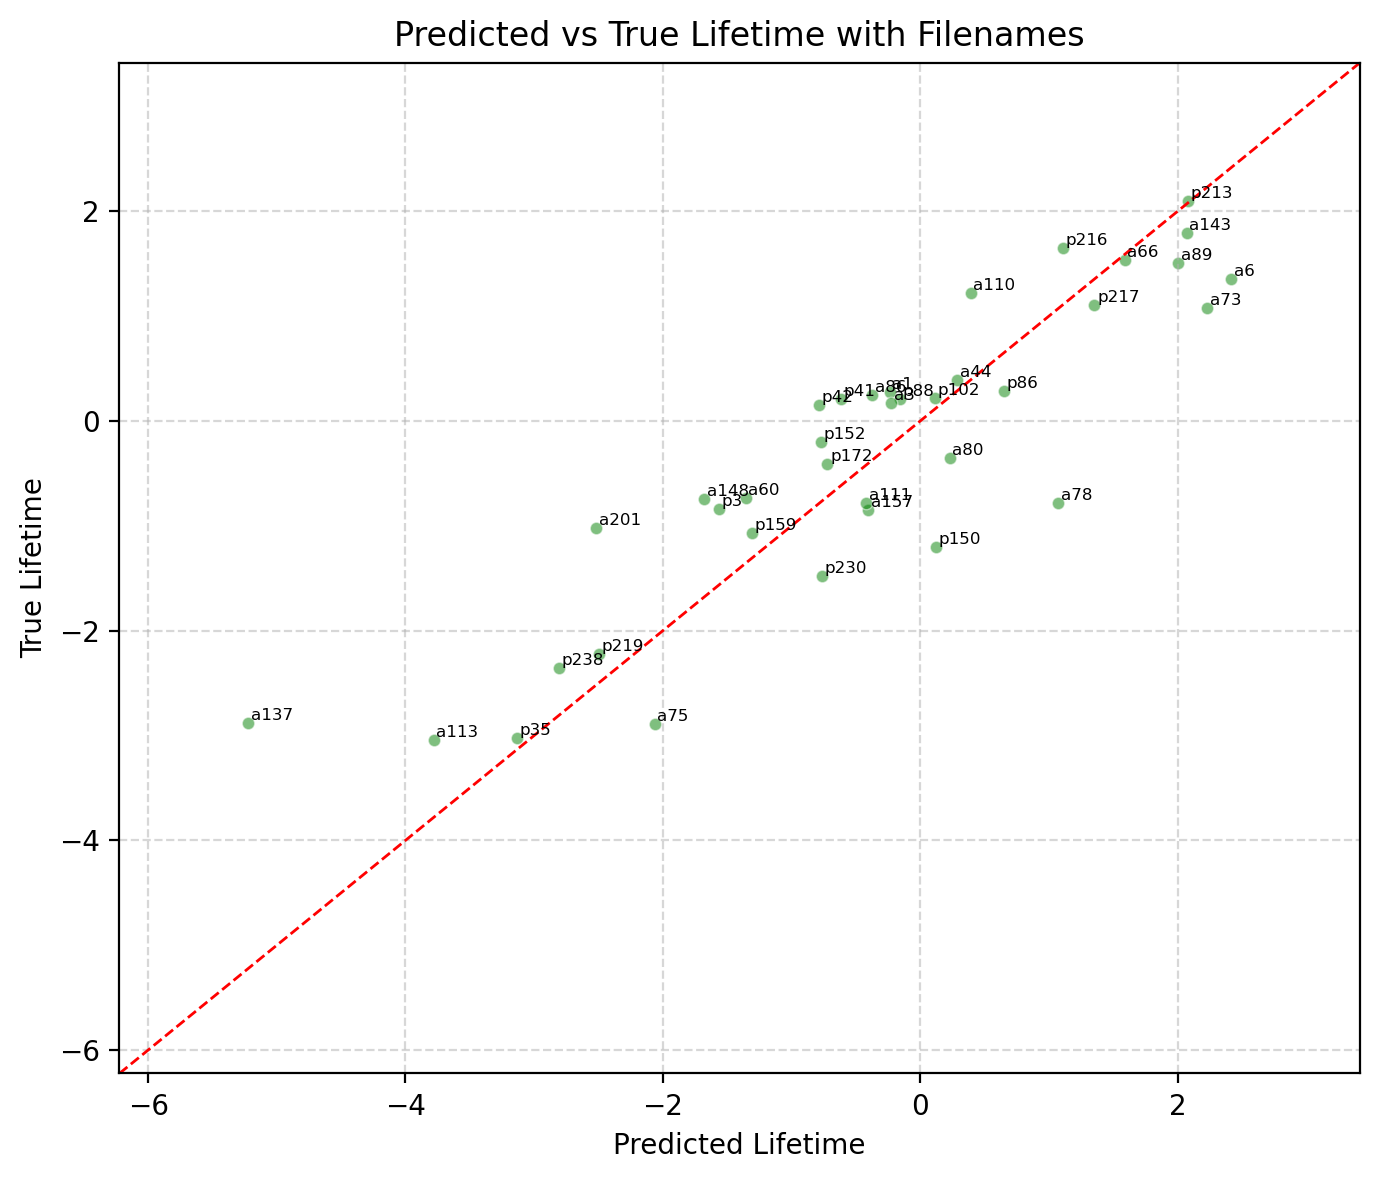

In [21]:
# 绘制预测值与真实值的拟合结果图，并添加标签
figsize = (7, 6)  # 调整图形大小以适应标签
plt.figure(figsize=figsize, dpi=200)
plt.scatter(y_test, y_pred, s=20, c='g', alpha=0.5, edgecolors='w', linewidth=0.5)

# 绘制 y = x 的对角线
min_val = min(min(y_test), min(y_pred)) - 1
max_val = max(max(y_test), max(y_pred)) + 1
plt.plot([min_val, max_val], [min_val, max_val], "r--", linewidth=1)

# 添加标签
for i, filename in enumerate(test_files):
    plt.text(y_test.iloc[i] + 0.02,  # x 位置稍微偏移
        y_pred[i] + 0.00 ,  # y 位置稍微偏移
        filename,fontsize=6,ha='left',va='bottom')

# 设置轴标签和标题
plt.xlabel('Predicted Lifetime')
plt.ylabel('True Lifetime')
plt.title('Predicted vs True Lifetime with Filenames')

# 设置轴范围以适应所有点和标签
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [70]:
test_files[test_files=='p213']

150    p213
Name: Filename, dtype: object

In [24]:
# good_molecular_id = [23,9,7] 
# for i in good_molecular_id:
#     print(f'molecular_id: E{i}')
#     print(f'Extend_Y_lg: {Extend_Y_lg[i]},  original_values:{10**Extend_Y_lg[i]}')
#     print(f'Extend_Y_pred: {Extend_Y_pred[i]}, original_values:{10**Extend_Y_pred[i]}\n')

In [181]:
X = merged_df_fc_ir_32.drop(['lifetime', 'Filename','Lifetime'], axis=1)
X.columns

Index(['MaxEStateIndex', 'MinEStateIndex', 'MinAbsEStateIndex',
       'MaxPartialCharge', 'BCUT2D_MWHI', 'BCUT2D_MRLOW', '1', '2', '3', '4',
       ...
       'ir_3590', 'ir_3591', 'ir_3592', 'ir_3593', 'ir_3594', 'ir_3595',
       'ir_3596', 'ir_3597', 'ir_3598', 'ir_3599'],
      dtype='object', length=3638)

In [182]:
merged_df_fc_ir_32['lifetime']   

0     -2.021156
1     -2.993525
2     -1.561702
3     -2.847714
4     -3.995537
         ...   
358   -2.520281
359    1.350373
360   -0.090963
361   -1.036122
362    1.540321
Name: lifetime, Length: 363, dtype: float64

In [31]:
'''归一化结果'''
import joblib
X = merged_df_fc_ir_32.drop(['lifetime', 'Filename','Lifetime'], axis=1)  # 特征
y = merged_df_fc_ir_32['lifetime']               # 目标变量
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=37)
model_ = RandomForestRegressor(n_estimators=47, max_depth=6, random_state=2)
model_.fit(X_train, y_train)
# 对测试集进行预测
y_pred = model_.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")  # 3/0.7579  4/0.7531458069979966
print(f"mse Score: {mse}")

# 保存训练好的模型到文件
# model_filename = 'random_forest_model.joblib'
# joblib.dump(model_, model_filename)
# print(f"模型已保存为 {model_filename}")

R^2 Score: 0.7829920926149369
mse Score: 0.6592739011044234
